In [1]:
import torch
from torch import nn

IMG_WIDTH = 20
IMG_HEIGHT = 28
IMG_CHANNELS = 1
    
face_dim = IMG_WIDTH*IMG_HEIGHT*IMG_CHANNELS

z_dim = 2
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(face_dim, 400)
        self.fc21 = nn.Linear(400, z_dim)
        self.fc22 = nn.Linear(400, z_dim)
        self.fc3 = nn.Linear(z_dim, 400)
        self.fc4 = nn.Linear(400, face_dim)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, face_dim))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [2]:
device = torch.device("cuda")
model = VAE().to(device)

In [3]:
model.load_state_dict(torch.load("results_face/epoch-10.pt"))

<All keys matched successfully>

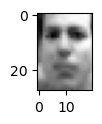

In [4]:
import numpy as np
from torch.distributions import Normal
from torch.nn import functional as F
import matplotlib.pyplot as plt
%matplotlib inline
z = torch.randn(1, 2).to(device)
xx = model.decode(z)
plt.figure(figsize=(1,1))
plt.imshow(xx.detach().cpu().reshape(IMG_HEIGHT, IMG_WIDTH), cmap="gray")

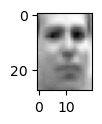

In [47]:
z = torch.randn(1, 2).to(device)
xx = model.decode(z)
plt.figure(figsize=(1,1))
plt.imshow(xx.detach().cpu().reshape(IMG_HEIGHT, IMG_WIDTH), cmap="gray")

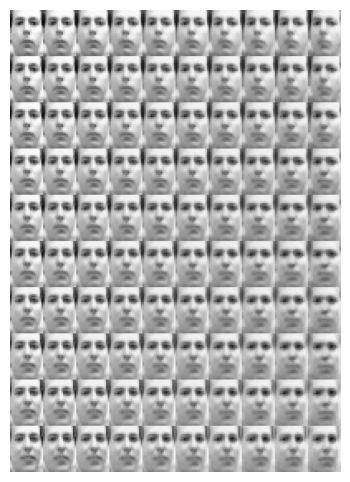

In [7]:
import numpy as np
from torch.distributions import Normal
from torch.nn import functional as F
import matplotlib.pyplot as plt
%matplotlib inline

IMG_HEIGHT, IMG_WIDTH
digit_size = 28
n_samples = 10
z_dim = 2
dim_1 = 0
dim_2 = 1

percentiles = torch.linspace(0.10, 0.9, n_samples)
z_dist = Normal(torch.zeros(1, 2), torch.ones(1, 2))
grid_x = z_dist.icdf(percentiles[:, None].repeat(1, z_dim))
grid_y = z_dist.icdf(percentiles[:, None].repeat(1, z_dim))
figure = np.zeros((IMG_HEIGHT * n_samples, IMG_WIDTH * n_samples))

input_sample = torch.zeros(1, 2)
z_sample_def = input_sample.clone().detach()

for yi in range(n_samples):
    for xi in range(n_samples):
        with torch.no_grad():
            z_sample = z_sample_def.clone().detach()
            z_sample[:, dim_1] = grid_x[xi, dim_1]
            z_sample[:, dim_2] = grid_y[yi, dim_2]
            x_decoded = model.decode(z_sample.to(device)).cpu()
        digit = x_decoded[0].reshape(IMG_HEIGHT, IMG_WIDTH)
        figure[yi*IMG_HEIGHT:(yi+1)*IMG_HEIGHT, xi*IMG_WIDTH:(xi+1)*IMG_WIDTH] = digit.numpy()
        
plt.figure(figsize=(6,6))
plt.imshow(figure, cmap='Greys_r')
plt.axis(False)
plt.show()

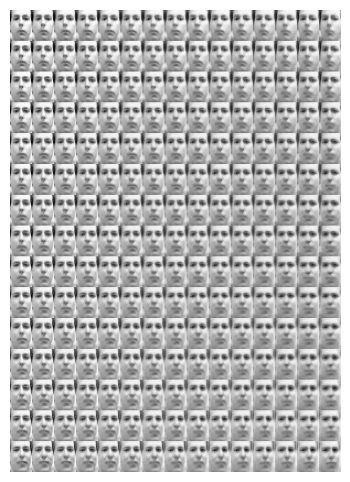

In [9]:
import numpy as np
from torch.distributions import Normal
from torch.nn import functional as F
import matplotlib.pyplot as plt
%matplotlib inline

IMG_HEIGHT, IMG_WIDTH
digit_size = 28
n_samples = 15
z_dim = 2
dim_1 = 0
dim_2 = 1

percentiles = torch.linspace(0.10, 0.9, n_samples)
z_dist = Normal(torch.zeros(1, 2), torch.ones(1, 2))
grid_x = z_dist.icdf(percentiles[:, None].repeat(1, z_dim))
grid_y = z_dist.icdf(percentiles[:, None].repeat(1, z_dim))
figure = np.zeros((IMG_HEIGHT * n_samples, IMG_WIDTH * n_samples))

input_sample = torch.zeros(1, 2)
z_sample_def = input_sample.clone().detach()

for yi in range(n_samples):
    for xi in range(n_samples):
        with torch.no_grad():
            z_sample = z_sample_def.clone().detach()
            z_sample[:, dim_1] = grid_x[xi, dim_1]
            z_sample[:, dim_2] = grid_y[yi, dim_2]
            x_decoded = model.decode(z_sample.to(device)).cpu()
        digit = x_decoded[0].reshape(IMG_HEIGHT, IMG_WIDTH)
        figure[yi*IMG_HEIGHT:(yi+1)*IMG_HEIGHT, xi*IMG_WIDTH:(xi+1)*IMG_WIDTH] = digit.numpy()
        
plt.figure(figsize=(6,6))
plt.imshow(figure, cmap='Greys_r')
plt.axis(False)
plt.show()